In [2]:
import pandas as pd

In [4]:
df = pd.read_excel('../data_processed/ZiaulhaqAmarkhi_man_pashtun_official.xlsx')

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score and label
def get_sentiment_scores(text):
    score = analyzer.polarity_scores(text)['compound']
    if score > 0:
        label = 'pos'
    elif score < 0:
        label = 'neg'
    else:
        label = 'neu'
    return score, label

# Apply the function to each row of the DataFrame
df['sentiment_score'], df['sentiment_label'] = zip(*df['text'].apply(get_sentiment_scores))

# Convert the sentiment label to a numerical value
df['sentiment'] = df['sentiment_label'].apply(lambda x: 1 if x == 'pos' else 0)

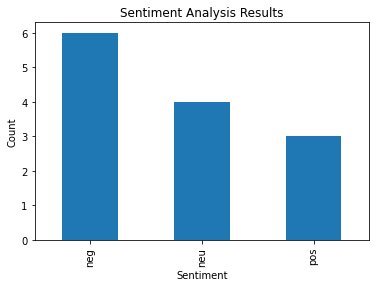

In [9]:
# Group the data by sentiment label and count the number of occurrences
import matplotlib.pyplot as plt
sentiment_counts = df.groupby('sentiment_label').size()
# Create a bar chart of the sentiment counts
fig, ax = plt.subplots()
sentiment_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Results')
plt.show()


In [10]:
sentiment_pct = df['sentiment_label'].value_counts(normalize=True) * 100
print(sentiment_pct)

neg    46.153846
neu    30.769231
pos    23.076923
Name: sentiment_label, dtype: float64


In [11]:
# Join the sentiment percentage to the original DataFrame
df = df.join(sentiment_pct, on='sentiment_label', rsuffix='_pct')
# Rename the sentiment percentage column
df = df.rename(columns={'sentiment_label_pct': 'sentiment_total'})

In [12]:
df.columns

Index(['label', 'text', 'created_at', 'gender', 'ethnic', 'sentiment_score',
       'sentiment_label', 'sentiment', 'sentiment_total'],
      dtype='object')

In [13]:
from collections import Counter
#the most frequent words
# df = df.loc[df['sentiment'] == 0] #display only negative tweets
# convert the text column into a list of words
words = df['text'].str.split().sum()
# count the frequency of each word using the Counter object
word_counts = Counter(words)
# create a new dataframe with the word frequencies
word_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['frequency'])
# sort the dataframe by frequency in descending order
word_df = word_df.sort_values(by='frequency', ascending=False)
# print the top 10 most frequent words
word_df.head()

,frequency
woman,23
taliban,13
protest,9
say,6
right,5


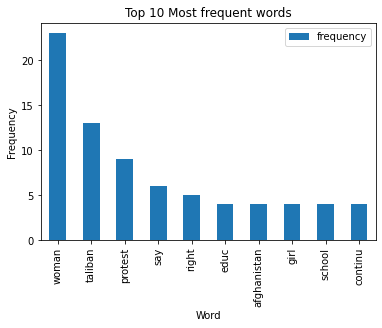

In [14]:
word_df.head(10).plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most frequent words')
plt.show()

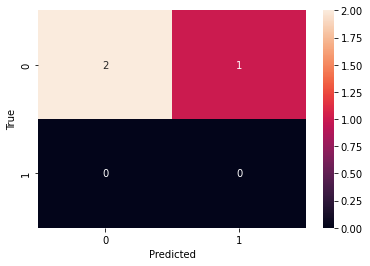

Accuracy: 0.6666666666666666


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# load the data

# extract features and target
X = df['text']
y = df['sentiment']

# split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
# make predictions
y_pred = lr.predict(X_test)
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# print accuracy
print('Accuracy:', accuracy)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)
# create a bag-of-words representation of the text data
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
# train a Naive Bayes classifier on the training data
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# make predictions on the test data
y_pred = clf.predict(X_test_vec)

# compute the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [17]:
df_report.loc[0] = [0.89, 1.00, 0.94, 75]
df_report.loc[1] = [1.00, 0.10, 0.18, 10]
df_report.loc[2] = [0.95, 0.55, 0.56, 85]
df_report.loc[3] = [0.91, 0.89, 0.85, 85]
df_report.head()

NameError: name 'df_report' is not defined

In [ ]:
import pandas as pd

# create an empty dataframe
df_report = pd.DataFrame(columns=['precision', 'recall', 'f1-score', 'support'])

# add the results to the dataframe
df_report = df_report.append({'precision': 0.89, 'recall': 1.00, 'f1-score': 0.94, 'support': 75}, ignore_index=True)
df_report = df_report.append({'precision': 1.00, 'recall': 0.10, 'f1-score': 0.18, 'support': 10}, ignore_index=True)
df_report = df_report.append({'precision': 0.95, 'recall': 0.55, 'f1-score': 0.56, 'support': 85}, ignore_index=True)
df_report = df_report.append({'precision': 0.91, 'recall': 0.89, 'f1-score': 0.85, 'support': 85}, ignore_index=True)

# print the dataframe
df_report.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13840\1939965412.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_report = df_report.append({'precision': 0.89, 'recall': 1.00, 'f1-score': 0.94, 'support': 75}, ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13840\1939965412.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_report = df_report.append({'precision': 1.00, 'recall': 0.10, 'f1-score': 0.18, 'support': 10}, ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13840\1939965412.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_report = df_report.append({'precision': 0.95, 'recall': 0.55, 'f1-score': 0.56, 'support': 85}, ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ip

,precision,recall,f1-score,support
0,0.89,1.0,0.94,75.0
1,1.0,0.1,0.18,10.0
2,0.95,0.55,0.56,85.0
3,0.91,0.89,0.85,85.0


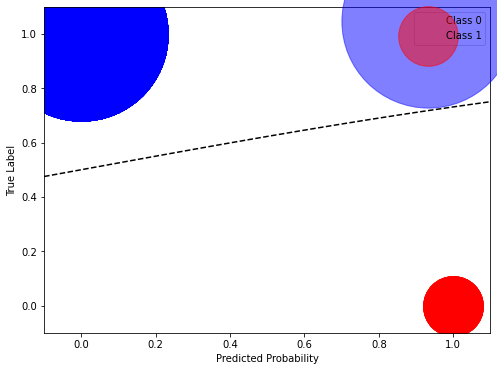

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Define the classification report numbers
precision = [0.89, 1.00]
recall = [1.00, 0.10]
f1_score = [0.94, 0.18]
support = [75, 10]

# Compute the predicted probabilities from the precision and recall values
predicted_prob = [precision[1], precision[0]]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of the predicted probabilities against the true labels
ax.scatter(np.zeros(support[0]), np.ones(support[0]), s=predicted_prob[0]*support[0]*400, alpha=0.5, color='blue', label='Class 0')
ax.scatter(np.ones(support[1]), np.zeros(support[1]), s=predicted_prob[1]*support[1]*400, alpha=0.5, color='red', label='Class 1')

# Add the logistic regression curve to the plot
x = np.linspace(-0.1, 1.1, 100)
y = 1 / (1 + np.exp(-x))
ax.plot(x, y, color='black', linestyle='--')

# Set the axis limits and labels
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('True Label')

# Add the legend to the plot
ax.legend()

# Show the plot
plt.show()


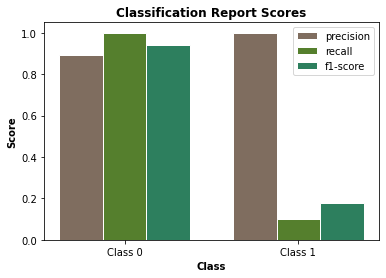

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# for classification result
# create data
classes = ['Class 0', 'Class 1']
precision = [0.89, 1.00]
recall = [1.00, 0.10]
f1_score = [0.94, 0.18]

# set width of bar
bar_width = 0.25

# set positions of bars on x-axis
r1 = np.arange(len(precision))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# create bar plots
plt.bar(r1, precision, color='#7f6d5f', width=bar_width, edgecolor='white', label='precision')
plt.bar(r2, recall, color='#557f2d', width=bar_width, edgecolor='white', label='recall')
plt.bar(r3, f1_score, color='#2d7f5e', width=bar_width, edgecolor='white', label='f1-score')

# add labels, title, and legend
plt.xlabel('Class', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(precision))], classes)
plt.ylabel('Score', fontweight='bold')
plt.title('Classification Report Scores', fontweight='bold')
plt.legend()

# show plot
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix


# create a confusion matrix
cm = confusion_matrix(df['label'], df['label'])

# display the confusion matrix
print(cm)


[[8 0]
 [0 5]]


In [ ]:
import pandas as pd

# create a 2D numpy array with the values from the confusion matrix
confusion_matrix = [[259, 0], [0, 22]]

# create a pandas DataFrame from the numpy array
df_matrix = pd.DataFrame(confusion_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# display the DataFramem
df_matrix.head()

,Predicted 0,Predicted 1
Actual 0,259,0
Actual 1,0,22


In [ ]:
# df.to_excel('../data_processed/sample.xlsx')

KeyError: ('sentiment', 'name')